In [1]:
import pandas as pd
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import ColumnDataSource, Grid, LinearAxis, Plot, VBar, HoverTool

In [2]:
train = pd.read_csv('../data/application_train.csv')

In [5]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
f"Row:{len(train)} / Features:{len(train.columns)}"

'Row:307511 / Features:122'

In [5]:
train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [4]:
train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
for c in train.columns:
    print(f'{c}  Amount:{train[c].isnull().sum()} / Ratio:{train[c].isnull().sum() / len(train) * 100:0.4f}%')

SK_ID_CURR  Amount:0 / Ratio:0.0000%
TARGET  Amount:0 / Ratio:0.0000%
NAME_CONTRACT_TYPE  Amount:0 / Ratio:0.0000%
CODE_GENDER  Amount:0 / Ratio:0.0000%
FLAG_OWN_CAR  Amount:0 / Ratio:0.0000%
FLAG_OWN_REALTY  Amount:0 / Ratio:0.0000%
CNT_CHILDREN  Amount:0 / Ratio:0.0000%
AMT_INCOME_TOTAL  Amount:0 / Ratio:0.0000%
AMT_CREDIT  Amount:0 / Ratio:0.0000%
AMT_ANNUITY  Amount:12 / Ratio:0.0039%
AMT_GOODS_PRICE  Amount:278 / Ratio:0.0904%
NAME_TYPE_SUITE  Amount:1292 / Ratio:0.4201%
NAME_INCOME_TYPE  Amount:0 / Ratio:0.0000%
NAME_EDUCATION_TYPE  Amount:0 / Ratio:0.0000%
NAME_FAMILY_STATUS  Amount:0 / Ratio:0.0000%
NAME_HOUSING_TYPE  Amount:0 / Ratio:0.0000%
REGION_POPULATION_RELATIVE  Amount:0 / Ratio:0.0000%
DAYS_BIRTH  Amount:0 / Ratio:0.0000%
DAYS_EMPLOYED  Amount:0 / Ratio:0.0000%
DAYS_REGISTRATION  Amount:0 / Ratio:0.0000%
DAYS_ID_PUBLISH  Amount:0 / Ratio:0.0000%
OWN_CAR_AGE  Amount:202929 / Ratio:65.9908%
FLAG_MOBIL  Amount:0 / Ratio:0.0000%
FLAG_EMP_PHONE  Amount:0 / Ratio:0.0000%
FLA

### Data Visualisation

In [7]:
# Bar chart
def plot_bar_chart(series, title, width=1000):
    items = dict(series.value_counts())
    keys = list(items.keys())
    values = list(items.values())
    source = ColumnDataSource(data=dict(
    x=keys,
    y=values,
    ))
    TOOLTIPS = [
    ("Column name", "@x"),
    ("Count", "@y"),
    ]
    p = figure(plot_width=width, plot_height=400, x_range=keys, title=title,
               toolbar_location=None, tooltips=TOOLTIPS, tools="")
    glyph = VBar(x="x", top="y", width=0.9)
    p.add_glyph(source, glyph)
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    show(p)

In [8]:
# Histogram
def plot_histogram(series, title, width=1000):
    p = figure(plot_width=width, plot_height=400, title=title, toolbar_location=None, tools="")
    hist, edges = np.histogram(series, density=True, bins=30)
    p.quad(
        top=hist,
        bottom=0,
        left=edges[:-1],
        right=edges[1:],
        fill_color="navy",
        alpha=0.2
    )
    p.y_range.start = 0
    show(p)

In [9]:
# Line chart
def plot_line_chart(dataframe, col_name, date_name, title):
    grouped = dataframe.groupby(pd.Grouper(key=date_name, freq='D')).agg(['count'])
    source = ColumnDataSource(grouped)
    hover_tool = HoverTool(
        tooltips=[
            ("Amount", f"@{col_name}"),
            ("Datetime", "@date_name{%F}"), 
        ],
        formatters={
            f'{date_name}': 'datetime',
        },
        mode='mouse'
    )
    p = figure(plot_width=1000, x_axis_type='datetime', toolbar_location=None, tools=[hover_tool])
    p.line(x=col_name, y=date_name, source=source, legend_label=title)
    p.yaxis.axis_label = 'Amount'
    show(p)

In [ ]:
import numpy as np
# Output a graph for each column. Missing values ​​are complemented with "-999"
for c in train.columns:
    series = train[c].copy()
    if series.dtype == 'int64' or series.dtype == 'float64':
        series.fillna(-999, inplace=True)
        plot_histogram(series, c)
    else:
        series.fillna('-999', inplace=True)
        plot_bar_chart(series, c)
        print(series.value_counts())

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
-999                 1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree              

In [10]:
from pycaret.classification import *

In [11]:
# pycaret
exp = setup(data=train,
            target='TARGET',
            session_id=123,
#             normalize = True, 
#             transformation = True, 
#             ignore_low_variance = True,
#             remove_multicollinearity = True,
#             multicollinearity_threshold = 0.95,
            ignore_features = ['SK_ID_CURR'],
            log_experiment = True,
            experiment_name = 'credit1', 
            n_jobs=-1,
            silent=True)

,Description,Value
0,session_id,123
1,Target,TARGET
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(307511, 122)"
5,Missing Values,True
6,Numeric Features,62
7,Categorical Features,58
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
models = compare_models(include=['xgboost', 'gbc', 'rf'],
                        sort='AUC')
#                         n_select=3

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9199,0.7504,0.0117,0.5511,0.0229,0.0196,0.0714,133.2320
xgboost,Extreme Gradient Boosting,0.9195,0.7455,0.0338,0.4805,0.0631,0.0531,0.1109,74.7420
rf,Random Forest Classifier,0.9197,0.7090,0.0006,0.6833,0.0013,0.0011,0.0187,37.6250


In [13]:
xgb = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9195,0.7491,0.0347,0.4878,0.0648,0.0547,0.1137
1,0.9207,0.7377,0.0411,0.5917,0.0768,0.0671,0.1409
2,0.9199,0.7498,0.0399,0.5188,0.0741,0.0634,0.1272
3,0.9194,0.7476,0.0295,0.4679,0.0555,0.0464,0.1017
4,0.9190,0.7336,0.0324,0.4444,0.0604,0.0500,0.1028
5,0.9194,0.7404,0.0289,0.4673,0.0545,0.0455,0.1006
6,0.9186,0.7586,0.0266,0.3966,0.0499,0.0402,0.0856
7,0.9197,0.7505,0.0376,0.5000,0.0700,0.0594,0.1204
8,0.9193,0.7431,0.0370,0.4706,0.0687,0.0576,0.1145
9,0.9193,0.7446,0.0301,0.4602,0.0565,0.0471,0.1015


In [14]:
evaluate_model(xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

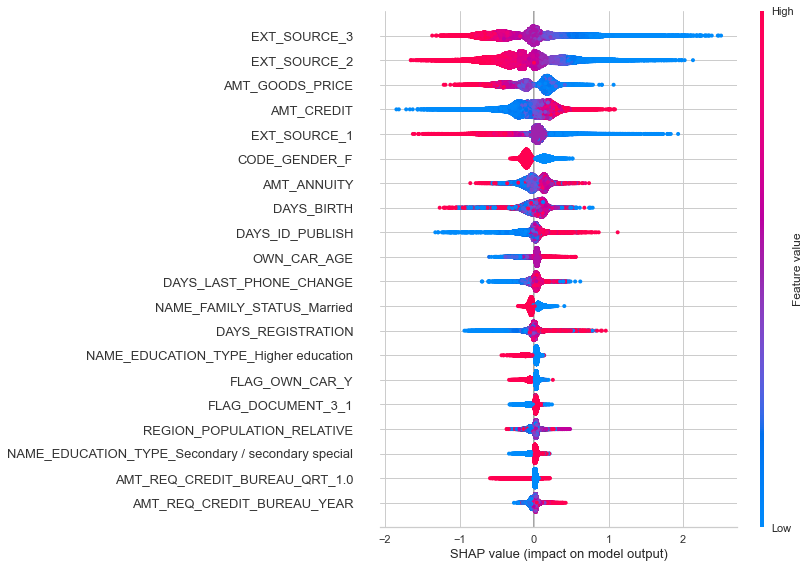

In [15]:
interpret_model(xgb)

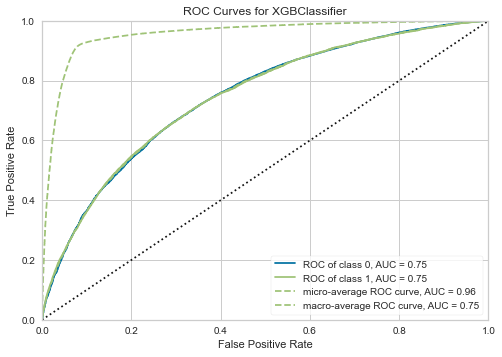

In [16]:
plot_model(xgb)

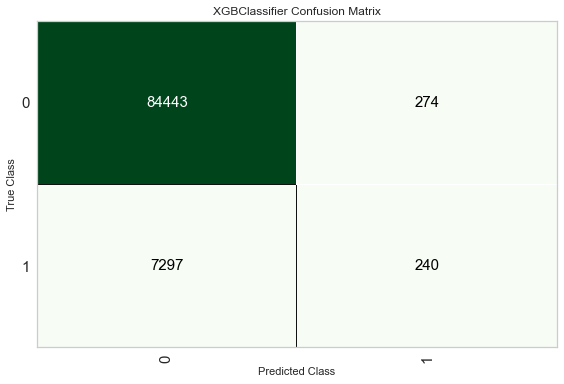

In [17]:
plot_model(xgb, plot='confusion_matrix')

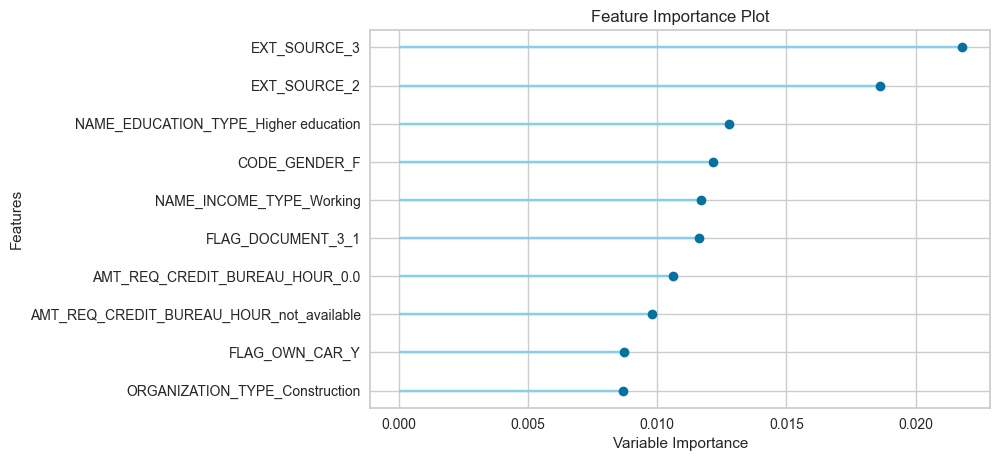

In [18]:
plot_model(xgb, plot='feature')

In [19]:
importance = pd.DataFrame(models.feature_importances_, index=exp[0].columns, columns=['importance'])
importance.sort_values('importance', ascending=False)

AttributeError: 'Series' object has no attribute 'columns'

In [ ]:
features = list(importance.sort_values('importance', ascending=False).index[:20])

In [ ]:
set(features) - set(train.columns)

In [ ]:
features.remove('CODE_GENDER_F')
features.remove('NAME_CONTRACT_TYPE_Cash loans')
features.remove('NAME_EDUCATION_TYPE_Higher education')
features.remove('NAME_FAMILY_STATUS_Married')

In [ ]:
features.extend(['CODE_GENDER',
 'NAME_CONTRACT_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS'])

In [ ]:
features

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a3d361b4-d400-42b1-9ca4-0bd2e2d55e02' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>